In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [3]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver
import gas_phase_data
import numpy as np

In [4]:
import sys
sys.path.append("../")
import surp
import multizone_sim


In [5]:
import vice

In [13]:
# mc = ModelComparer(["cristallo11", "cristallo11_reduced_eta_n", "cristallo11_lc18"])
mc = ModelComparer(["fiducial", "eta_r", "denom_r", "tripled_agb_fast"], labels=["fiducial", "reduced eta", "corrected eta", "amp agb"])

# Mean abundance star tracks

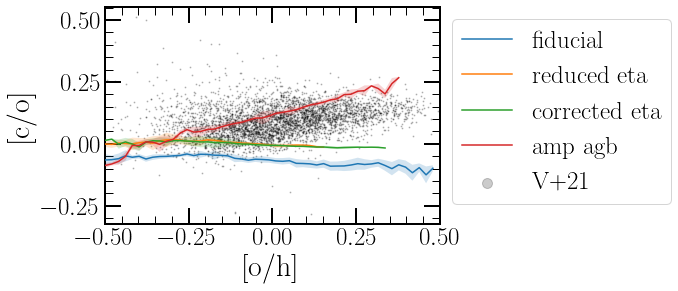

<Figure size 576x432 with 0 Axes>

In [14]:
mc.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.5, 0.5))

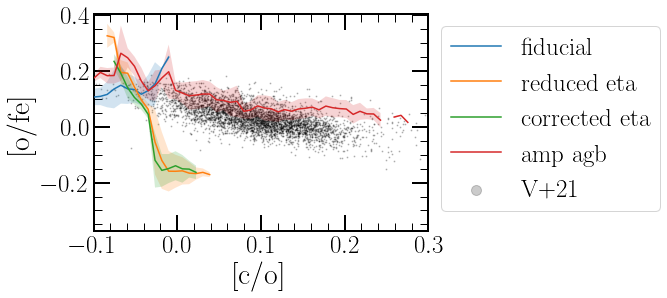

<Figure size 576x432 with 0 Axes>

In [18]:
mc.plot_mean_stars("[c/o]", "[o/fe]", xlim=(-0.1, 0.3))

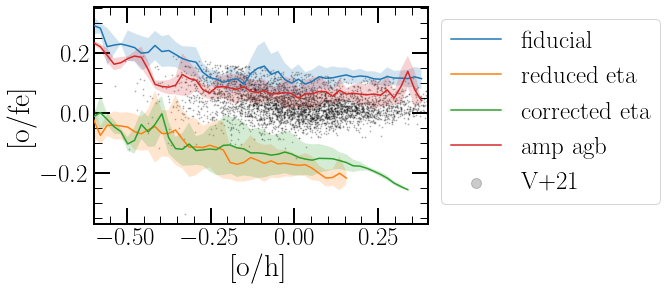

<Figure size 576x432 with 0 Axes>

In [15]:
mc.plot_mean_stars("[o/h]", "[o/fe]", xlim=(-0.6, 0.4))

saving


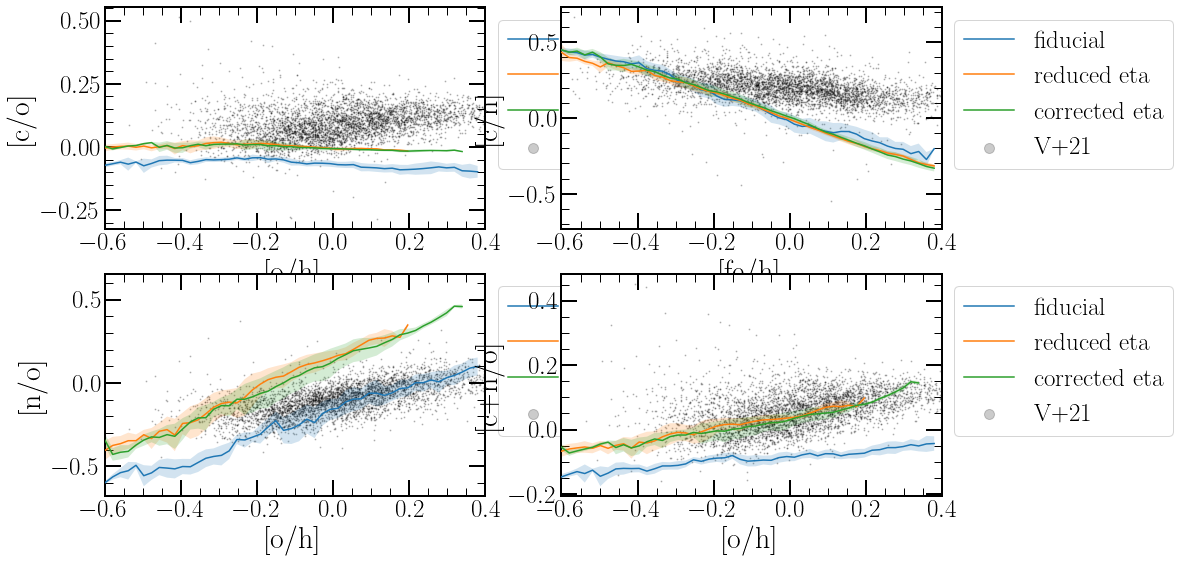

In [18]:
mc.plot_all_mean_stars(filename="stars_eta")

# Gas phase tracks

FileNotFoundError: [Errno 2] No such file or directory: 'chaos_m101.dat'

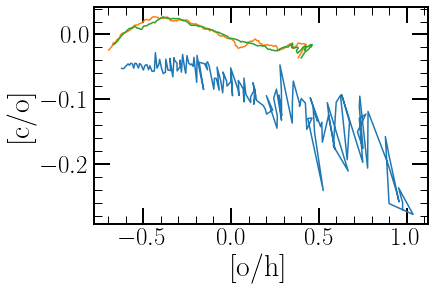

In [19]:
mc.plot_gas("[o/h]", "[c/o]")
# mc.plot_gas("[fe/h]", "[c/n]")

# MDFs

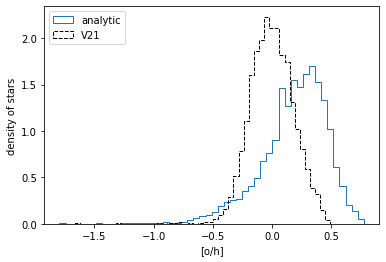

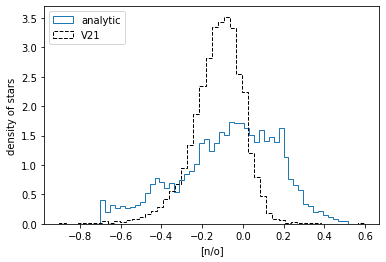

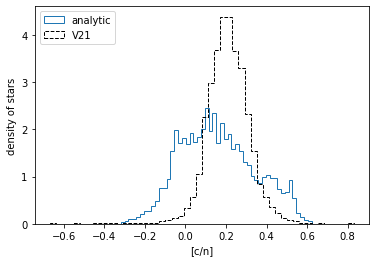

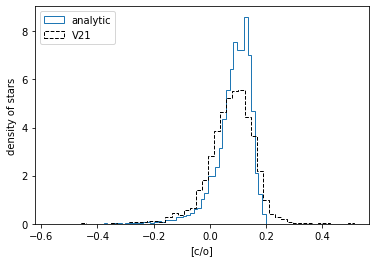

In [17]:
mc.plot_mdf("[o/h]")
mc.plot_mdf("[n/o]")
mc.plot_mdf("[c/n]")
mc.plot_mdf("[c/o]")

# Stars

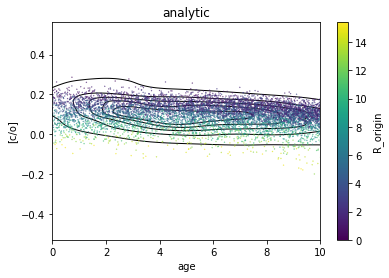

In [18]:
mc.plot_stars("age", "[c/o]", c="R_origin", xlim=(0, 10))

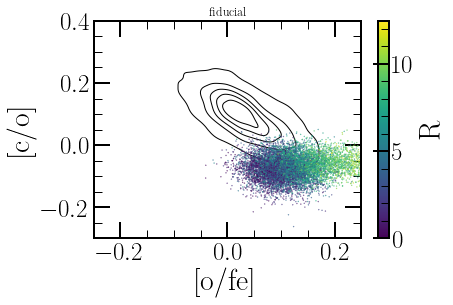

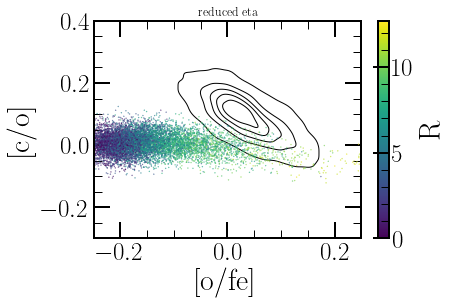

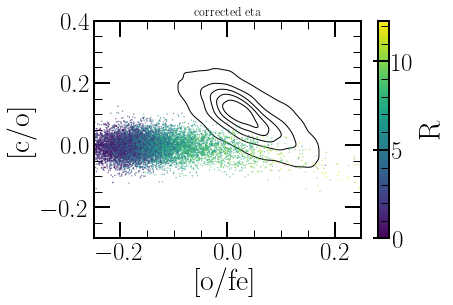

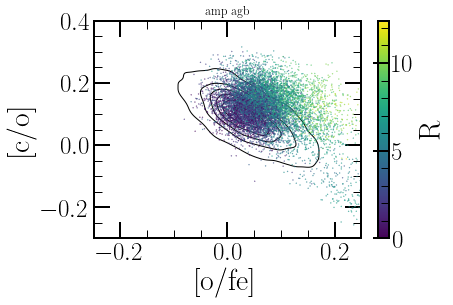

In [17]:
mc.plot_stars("[o/fe]", "[c/o]", c="age", xlim=(-0.25, 0.25), ylim=(-0.3, 0.4), c_label="R", solar_neighborhood=True)

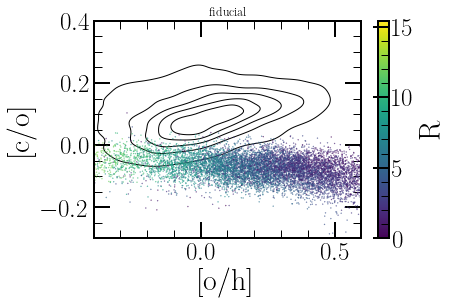

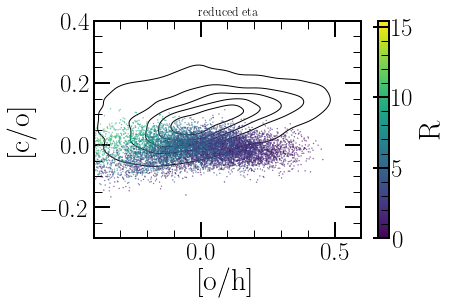

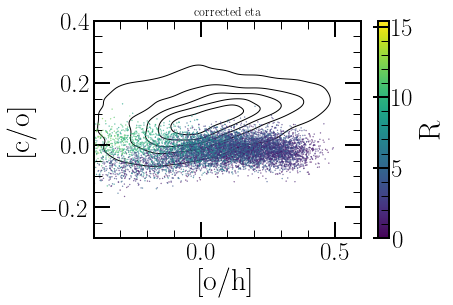

In [22]:
mc.plot_stars("[o/h]", "[c/o]", c="R_origin", xlim=(-0.4, 0.6), ylim=(-0.3, 0.4), c_label="R")

# Gas phase tracks

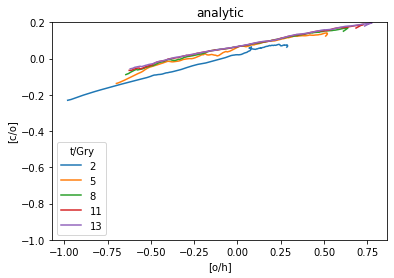

In [24]:
mc.plot_model_fixed_t(ylim=(-1, 0.2))

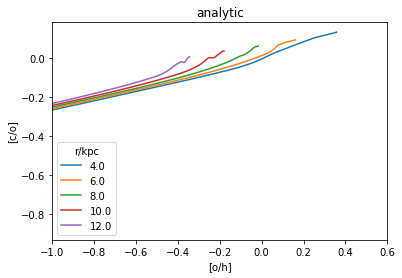

In [25]:
mc.plot_model_fixed_r()


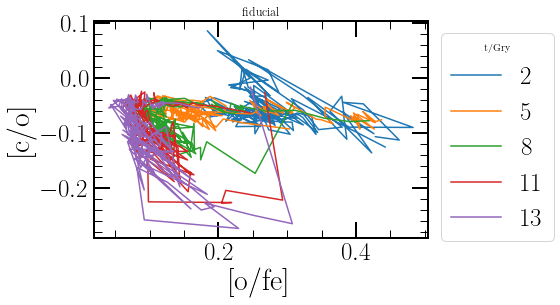

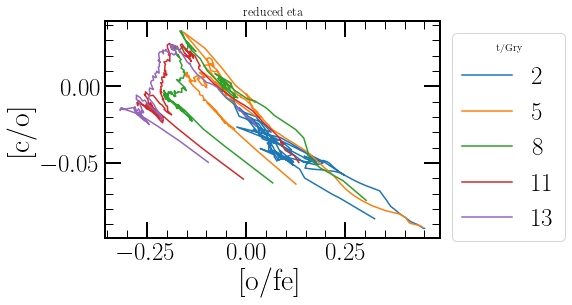

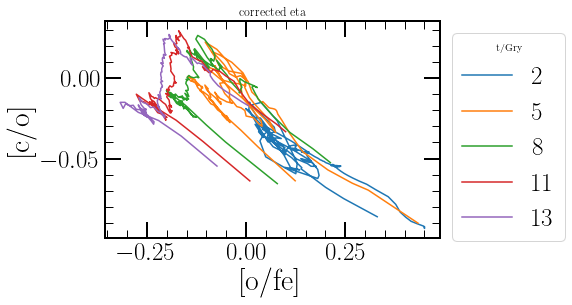

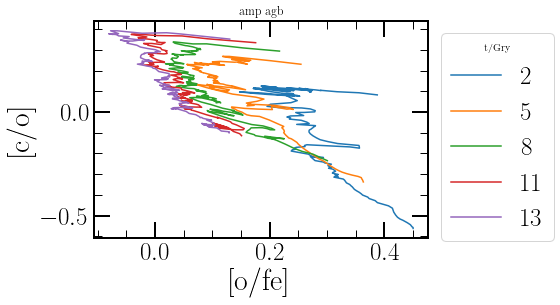

In [20]:
for model in mc.models.keys():
    mc.plot_model_fixed_t(model, "[o/fe]", "[c/o]")

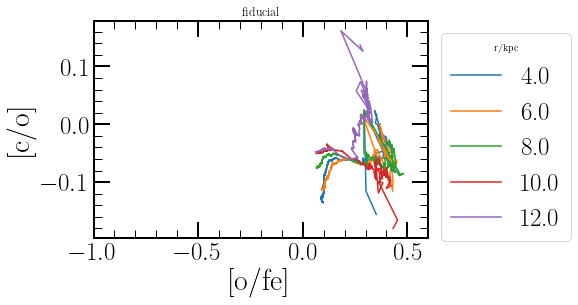

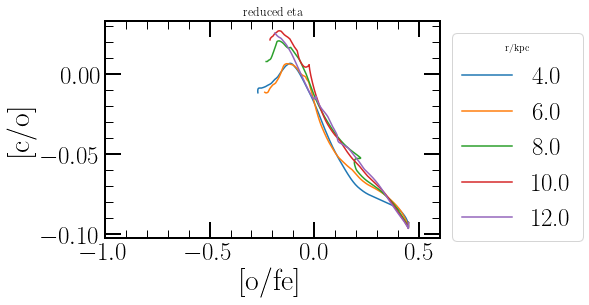

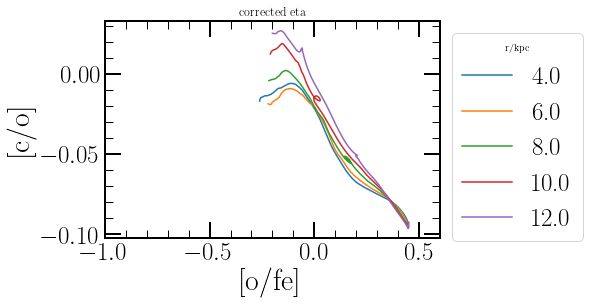

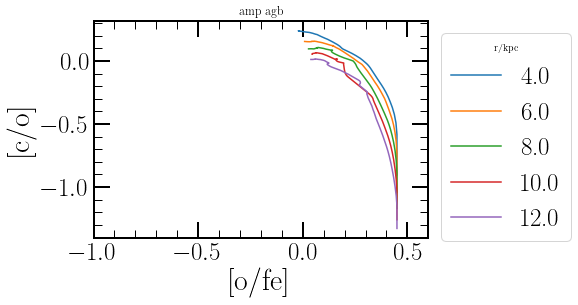

In [21]:
for model in mc.models.keys():
    mc.plot_model_fixed_r(model, "[o/fe]", "[c/o]")

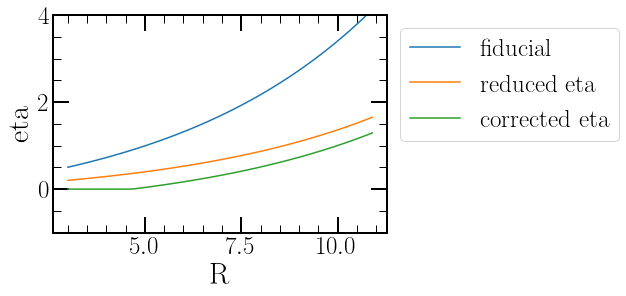

In [27]:
eta_0 = []
r_eff_0 = []
r = np.arange(30, 110)
for i in r:
    eta_0.append( mc.models["fiducial"].zones["zone%i" % i].history["eta_0"][-1])
    r_eff_0.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])

#_eff_0 = 0.4
eta_0 = np.array(eta_0)
denom_0 = 1 + eta_0 - r_eff_0


def plot_eta(model):
    eta = []
    r_eff = []
    r = np.arange(30, 110)
    for i in r:
        eta.append( mc.models[model].zones["zone%i" % i].history["eta_0"][-1])
        r_eff.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])
    denom = 1 + np.array(eta) - r_eff
    #, = plt.plot(r/10, r_eff, label=mc.models[model].label)
    plt.plot(r/10, np.array(eta), label=mc.models[model].label)

for model_name in mc.models.keys():
    plot_eta(model_name)
    
plt.xlabel("R")
plt.ylabel("eta")

pii = 0.33

#plt.plot(r/10, np.array(eta), label="test")
plt.ylim(-1, 4)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")


In [37]:
def get_history(model, name):
    values = []
    for i in r:
        values.append(model.zones["zone%i" % i].history[name][-1])
        
    return np.array(values)

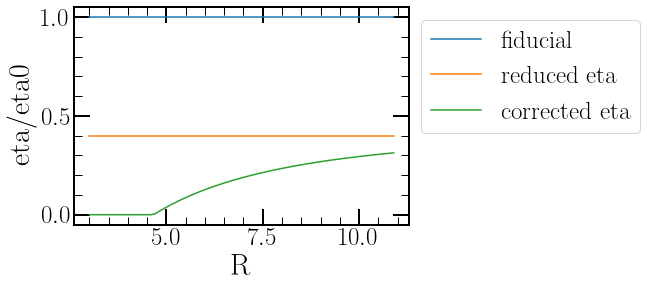

In [39]:

r = np.arange(30, 110)

eta_0 = get_history(mc.models["fiducial"], "eta_0")
r_eff_0 = get_history(mc.models["fiducial"], "r_eff")
denom_0 = 1 + eta_0 - r_eff_0


def plot_eta(model):
    eta = get_history(mc.models[model], "eta_0")
    r_eff = get_history(mc.models[model], "r_eff")
    denom = 1 + np.array(eta) - r_eff
    #, = plt.plot(r/10, r_eff, label=mc.models[model].label)
    plt.plot(r/10, np.array(eta)/eta_0, label=mc.models[model].label)

for model_name in mc.models.keys():
    plot_eta(model_name)
    
plt.xlabel("R")
plt.ylabel("eta/eta0")

plt.legend(bbox_to_anchor=(1,1), loc="upper left")


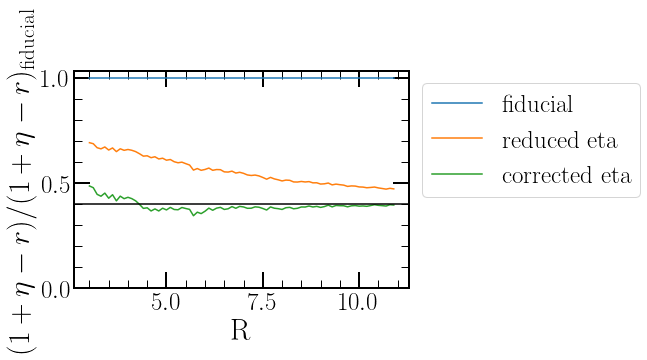

In [34]:
eta_0 = []
r_eff_0 = []
r = np.arange(30, 110)
for i in r:
    eta_0.append( mc.models["fiducial"].zones["zone%i" % i].history["eta_0"][-1])
    r_eff_0.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])

eta_0 = np.array(eta_0)

denom_0 = 1 + eta_0 - r_eff_0


def plot_eta(model):
    eta = []
    r_eff = []
    r = np.arange(30, 110)
    for i in r:
        eta.append( mc.models[model].zones["zone%i" % i].history["eta_0"][-1])
        r_eff.append( mc.models["fiducial"].zones["zone%i" % i].history["r_eff"][-1])

    denom = 1 + np.array(eta) - r_eff
    p, = plt.plot(r/10, denom/denom_0, label=mc.models[model].label)

for model_name in mc.models.keys():
    plot_eta(model_name)
    
plt.xlabel("R")
plt.ylabel(r"$(1+\eta - r)/(1+\eta-r)_\text{fiducial}$")

plt.axhline(1/2.5, color="k")


plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylim(0)

plt.savefig("figures/depletion.jpeg")

In [41]:
h = mc.models["fiducial"].zones["zone70"].history

In [79]:
time = np.array(h["time"])
dt = time[1] - time[0]

ifr = np.array(h["ifr"])
sfr = np.array(h["sfr"])
ofr = np.array(h["ofr"])
mgas = np.array(h["mgas"])
d_mgas = np.append(-mgas[1:] + mgas[:-1], 8.7e+3) / dt

eta = np.array(h["eta_0"])
r_eff = np.array(h["r_eff"])

In [68]:
tau_star = mgas/sfr/1e9 #Gyr
tau_star

array([        inf, 33.44181867, 25.22099551, ...,  2.54359067,
        2.54516028,  2.54673136])

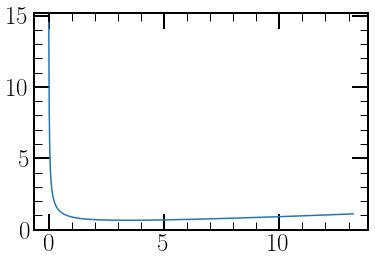

In [96]:
tau_dep = tau_star/(1 + eta - 0.4)
plt.plot(time, tau_dep)

In [87]:
d_mgas

array([-1.405671e+09, -7.077430e+08, -3.112440e+08, ...,  8.700000e+05,
        8.700000e+05,  8.700000e+05])

In [86]:
ifr * 1e9

array([         nan, 1.406808e+09, 7.099692e+08, ..., 7.289690e+07,
       7.143738e+07, 7.150050e+07])

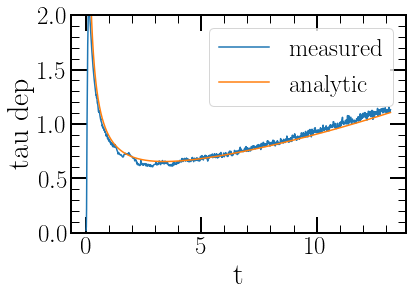

In [110]:
tau_dep_1 = -(mgas)/(-d_mgas - 1e9*ifr)
plt.plot(time, tau_dep_1, label="measured")
plt.plot(time, tau_dep, label="analytic")
plt.ylim(0, 2)
plt.ylabel("tau dep")
plt.xlabel("t")
plt.legend()
plt.savefig("figures/tau_dep.jpeg")

In [ ]:

def plot_tau_dep(model):
    eta = get_history(mc.models[model], "eta_0")
    r_eff = get_history(mc.models[model], "r_eff")
    denom = 1 + np.array(eta) - r_eff
    #, = plt.plot(r/10, r_eff, label=mc.models[model].label)
    plt.plot(r/10, np.array(eta)/eta_0, label=mc.models[model].label)

for model_name in mc.models.keys():
    plot_eta(model_name)
    
plt.xlabel("R")
plt.ylabel("eta/eta0")

plt.legend(bbox_to_anchor=(1,1), loc="upper left")